<a href="https://colab.research.google.com/github/yogidharma21/Belajar-Machine-Learning-Pemula/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Yogi_Dharma_Susanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [42]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [43]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
bank = pd.read_csv(url)

In [44]:
# Tampilkan 5 baris pertama dengan function head.
bank.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [45]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [46]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
bank.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# Exploratory Data Analysis (EDA)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [47]:
numeric_features = bank.select_dtypes(include='number').columns

In [48]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
bank[numeric_features].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


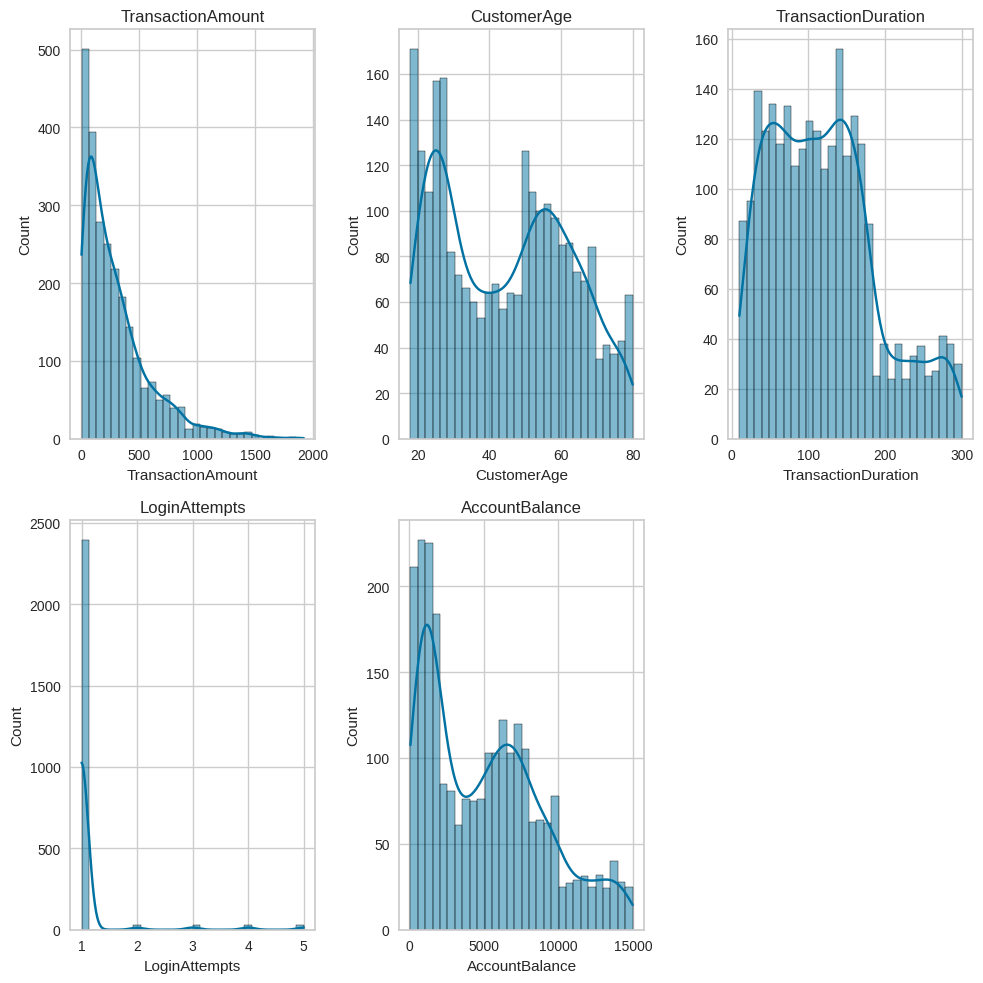

In [49]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize = (10,10))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(2, 3, i)
  sns.histplot(bank[column], kde=True, bins=30)
  plt.title(f'{column}')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/tmp/ipython-input-2265280110.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



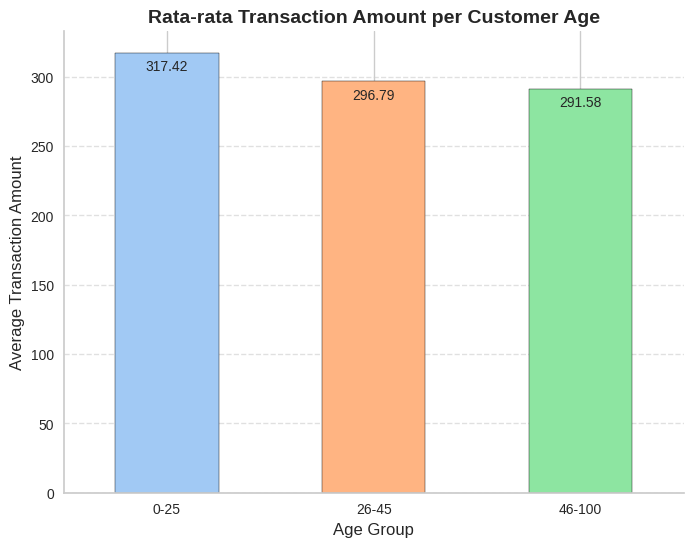

In [50]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

bank["RangeOfCustomer"] = pd.cut(bank["CustomerAge"], bins=[0, 25, 45, 100], labels=['Young', 'Adult', 'Old'], include_lowest=True)


age_group_amount = bank.groupby('RangeOfCustomer')['TransactionAmount'].mean()

colors = sns.color_palette("pastel", len(age_group_amount))

plt.figure(figsize=(8,6))
age_group_amount.plot(
    kind='bar',
    color=colors,
    edgecolor="black"
)


plt.title("Rata-rata Transaction Amount per Customer Age", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.xticks(rotation=0, ticks=range(len(age_group_amount)), labels=["0-25", "26-45", "46-100"])
plt.ylabel("Average Transaction Amount", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine()

for i, val in enumerate(age_group_amount):
    plt.text(i, val + (-0.04 * max(age_group_amount)), f"{val:.2f}", ha="center", fontsize=10)

plt.show()


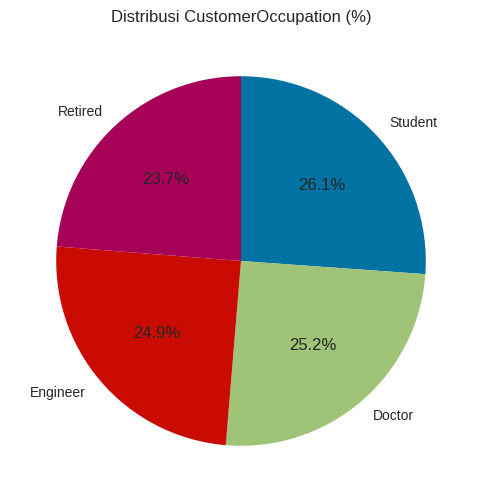

In [51]:
# Hitung jumlah tiap kategori CustomerOccupation
occupation_counts = bank['CustomerOccupation'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    occupation_counts,
    labels=occupation_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

plt.title("Distribusi CustomerOccupation (%)")
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [52]:
# Mengecek dataset menggunakan isnull().sum()
bank.isnull().sum( )

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [53]:
# Mengecek dataset menggunakan duplicated().sum()
bank.duplicated().sum()

np.int64(21)

In [54]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
bank = bank.drop(columns=[col for col in bank.columns if 'IP' in col or 'ID' in col ])
bank.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,RangeOfCustomer
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Old
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Old
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Young
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Adult
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,NaN


In [55]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

MinMax = MinMaxScaler()
bank[numeric_features] = MinMax.fit_transform(bank[numeric_features])
bank[numeric_features].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [56]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
bank.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'RangeOfCustomer']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [57]:
missing_values = bank.isnull().sum()
missing_values

,0
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
Channel,27
CustomerAge,18
CustomerOccupation,23
TransactionDuration,26
LoginAttempts,21
AccountBalance,27


In [58]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

bank[numeric_features] = bank[numeric_features].fillna(bank[numeric_features].median())

categorical_features = bank.select_dtypes(include='object').columns
for column in categorical_features:
  bank[column] = bank[column].fillna(bank[column].mode()[0])

In [59]:
# Menghapus data duplikat menggunakan drop_duplicates().
bank = bank.drop_duplicates()
bank = bank.drop(columns="RangeOfCustomer")

In [60]:
bank.duplicated().sum()

np.int64(0)

In [61]:
bank.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

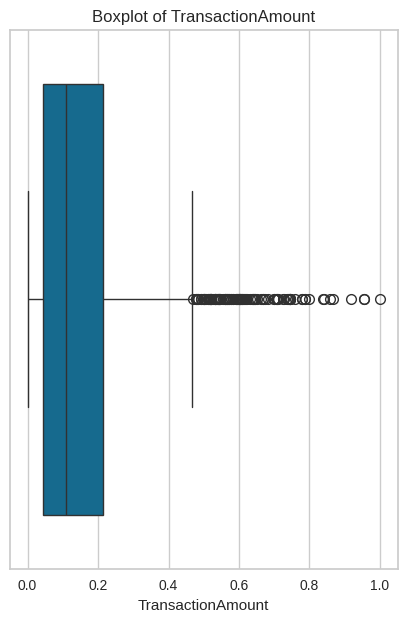

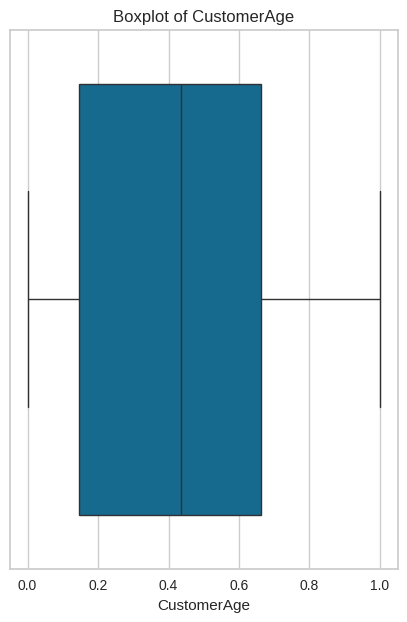

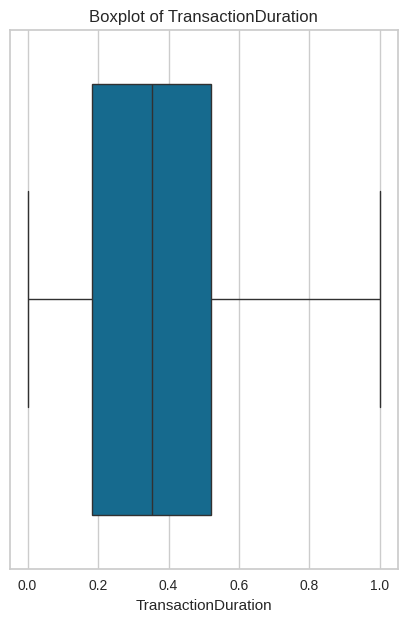

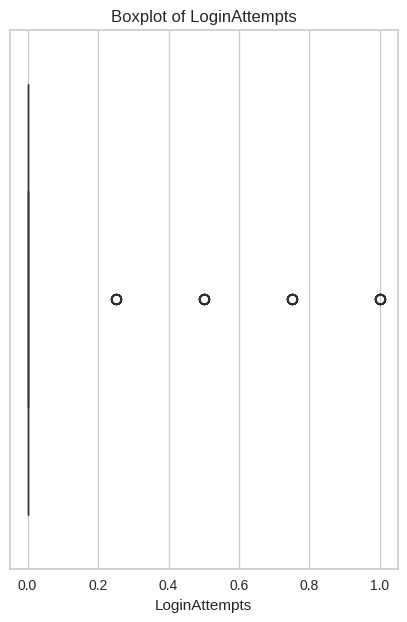

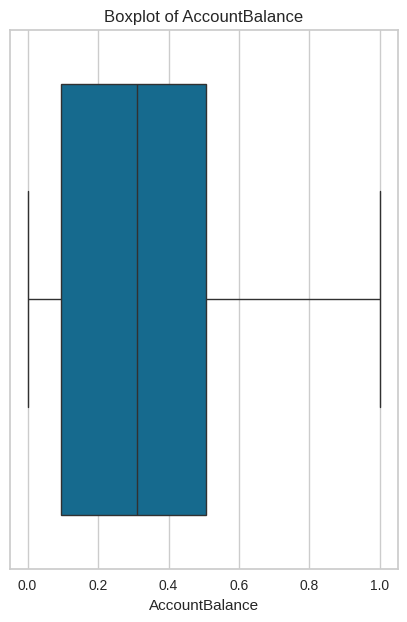

In [62]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numeric_features:
  plt.figure(figsize=(5, 7))
  sns.boxplot(x=bank[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [63]:
Q1 = bank[numeric_features].quantile(0.25)
Q3 = bank[numeric_features].quantile(0.75)
IQR = Q3 - Q1

condition = ~((bank[numeric_features] < (Q1 - 1.5 * IQR)) | (bank[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
bank_filtered_numeric = bank.loc[condition, numeric_features]

bank = pd.concat([bank_filtered_numeric, bank.loc[condition, categorical_features]], axis=1)

outlier di hapus karena nanti akan menggunakan algoritma Kmeans yang dimana algoritma tersebut sensitif terhadap outlier

In [64]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

bank["RangeOfAmount"] = pd.cut(bank["TransactionAmount"], bins=[0.00, 0.333, 0.666, 1], labels=['Low', 'Medium', 'High'], include_lowest=True)
bank["RangeOfCustomer"] = pd.cut(bank["CustomerAge"], bins=[0.00, 0.11, 0.44, 1.00], labels=['Young', 'Adult', 'Old'], include_lowest=True)
bank['RangeOfAccountBalance'] = pd.cut(bank["AccountBalance"], bins=[0.00, 0.333, 0.666, 1], labels=['Low', "Medium", "Many"], include_lowest=True)

for col in ["TransactionDate", "PreviousTransactionDate"]:
  bank[col] = pd.to_datetime(bank[col])

categorical_features = bank.select_dtypes(include=['object', 'category']).columns

InversEncode = {} # Disimpan untuk invers
for feature in categorical_features:
  LabelEncoder_Categoric = LabelEncoder()
  bank[feature] = LabelEncoder_Categoric.fit_transform(bank[feature])
  InversEncode[feature] = LabelEncoder_Categoric

bank.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,RangeOfAmount,RangeOfCustomer,RangeOfAccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,1,36,0,0,2024-11-04 08:08:08,0,1,2
1,0.195940,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,1,15,0,0,2024-11-04 08:09:35,0,1,1
2,0.065680,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,1,23,2,3,2024-11-04 08:07:04,0,2,0
3,0.096016,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,1,33,2,3,2024-11-04 08:09:06,0,0,2
4,0.006874,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,0,1,2,3,2024-11-04 08:06:39,0,0,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [65]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
bank.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,RangeOfAmount,RangeOfCustomer,RangeOfAccountBalance
count,2286.000000,2286.000000,2286.000000,2286.0,2286.000000,2286,2286.000000,2286.000000,2286.000000,2286.000000,2286,2286.000000,2286.000000,2286.000000
mean,0.132748,0.429677,0.375470,0.0,0.337391,2023-07-03 08:08:30.772090880,0.775591,20.987314,0.989501,1.521872,2024-11-04 08:09:22.140857344,0.078740,0.800962,0.849519
min,0.000000,0.000000,0.000000,0.0,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.000000,0.000000,2024-11-04 08:06:23,0.000000,0.000000,0.000000
25%,0.040790,0.145161,0.182759,0.0,0.095703,2023-03-29 17:53:31.249999872,1.000000,11.000000,0.000000,1.000000,2024-11-04 08:07:55,0.000000,0.000000,0.000000
50%,0.104101,0.435484,0.351724,0.0,0.311416,2023-07-04 18:05:17.500000,1.000000,21.000000,1.000000,2.000000,2024-11-04 08:09:20.500000,0.000000,1.000000,0.000000
75%,0.193979,0.661290,0.520690,0.0,0.505373,2023-10-04 17:09:15.750000128,1.000000,31.000000,2.000000,3.000000,2024-11-04 08:10:52,0.000000,1.000000,2.000000
max,0.467223,1.000000,1.000000,0.0,1.000000,2024-01-01 18:21:50,1.000000,42.000000,2.000000,3.000000,2024-11-04 08:12:23,1.000000,2.000000,2.000000
std,0.112915,0.284662,0.239815,0.0,0.259560,NaN,0.417284,12.225644,0.802007,1.132841,NaN,0.269392,0.685083,0.930456


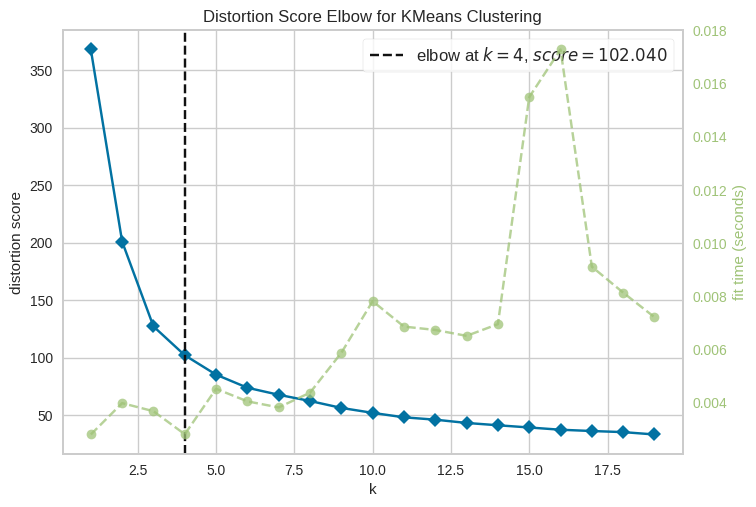

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

x = bank.iloc[:, [0, 1, 4]].values
kmeans = KMeans()
Visualizer = KElbowVisualizer(kmeans, k=(1, 20))
Visualizer.fit(x)
Visualizer.show()

In [67]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
k = 4

Jalankan cell code ini untuk menyimpan model kamu.

In [68]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [69]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(x, kmeans.labels_)
print(f"Silhoutte Score: {score}")

Silhoutte Score: 0.4030140854635268


In [70]:
#  Membuat visualisasi hasil clustering

x_df = pd.DataFrame(x, columns=["Transaction Amount", "Customer Age", "Account Balance"])
x_df['Cluster'] = labels

fig = px.scatter_3d(
    x_df,
    x="Transaction Amount",
    y="Customer Age",
    z="Account Balance",
    color=x_df['Cluster'].astype(str),
    title="3D Kmeans Clustering"
)
centers = kmeans.cluster_centers_
fig.add_scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode="markers",
    marker=dict(size=10, color="black", symbol="x"),
    name="Centroids"
)

fig.update_layout(
    width=800,
    height=600
)
fig.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

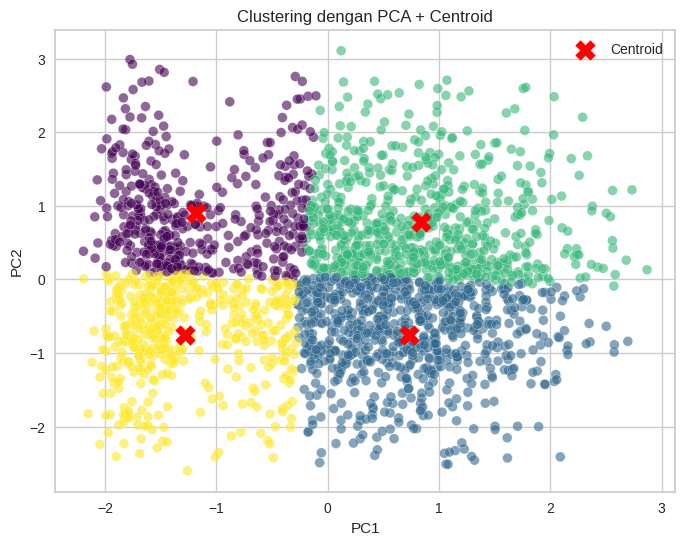

In [71]:
# Membangun model menggunakan PCA.

scaler = StandardScaler()
x_scaled = scaler.fit_transform(bank[numeric_features])

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# kmeans = KMeans(n_clusters=4, random_state=0)
labels_pca = kmeans.fit_predict(x_pca)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label="Centroid")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering dengan PCA + Centroid")
plt.legend()
plt.show()

In [72]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")

model_pca = {
    "scaler": scaler,
    "pca": pca,
    "kmeans": kmeans
}
joblib.dump(model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [73]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

def analyze_descriptive(x, labels, k, features_names):
  for cluster_id in range(k):
    cluster_data = x[labels == cluster_id]
    print(f"\nCluster {cluster_id + 1} ({len(cluster_data)} data):")

    for i, feature in enumerate(features_names):
      mean_value = cluster_data[:, i].mean()
      min_value = cluster_data[:, i].min()
      max_value = cluster_data[:, i].max()
      sum_value = cluster_data[:, i].sum()
      print(f"{feature}: mean = {mean_value:.2f}, min = {min_value:.2f}, max = {max_value:.2f}, sum = {sum_value:.2f}")

features_names = ["Transaction Amount", "Customer Age", "Account balance"]
analyze_descriptive(x, labels, k, features_names)


Cluster 1 (456 data):
Transaction Amount: mean = 0.14, min = 0.00, max = 0.47, sum = 62.18
Customer Age: mean = 0.28, min = 0.00, max = 0.53, sum = 128.65
Account balance: mean = 0.48, min = 0.22, max = 0.83, sum = 220.82

Cluster 2 (822 data):
Transaction Amount: mean = 0.13, min = 0.00, max = 0.46, sum = 107.78
Customer Age: mean = 0.71, min = 0.42, max = 1.00, sum = 583.63
Account balance: mean = 0.29, min = 0.00, max = 0.55, sum = 238.35

Cluster 3 (667 data):
Transaction Amount: mean = 0.13, min = 0.00, max = 0.46, sum = 89.46
Customer Age: mean = 0.12, min = 0.00, max = 0.45, sum = 78.56
Account balance: mean = 0.08, min = 0.00, max = 0.31, sum = 50.12

Cluster 4 (341 data):
Transaction Amount: mean = 0.13, min = 0.00, max = 0.46, sum = 44.04
Customer Age: mean = 0.56, min = 0.18, max = 0.84, sum = 191.40
Account balance: mean = 0.77, min = 0.50, max = 1.00, sum = 261.98


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

Cluster 1 (Nasabah dewasa dengan saldo menengah dan transaksi kecil)  

*   Rata-rata (mean) Transaction Amount = 0.14
*   Minimum Transaction Amount = 0.00
*   Maksimum Transaction Amount = 0.47
*   Total Transaction Amount = 62.18

*   Rata-rata (mean) Customer Age = 0.28
*   Minimum Customer Age = 0.00
*   Maksimum Customer Age = 0.53
*   Total Customer Age = 128.65

*   Rata-rata (mean) Account Balance = 0.48
*   Minimum Account Balance = 0.22
*   Maksimum Account Balance = 0.83
*   Total Account Balance = 220.82      

Nasabah di cluster ini didominasi oleh dewasa dengan saldo rekening pada tingkat menengah. Mereka cenderung melakukan transaksi dengan nominal kecil. Cluster ini menunjukkan kelompok dengan aset yang cukup stabil, sehingga bisa menjadi target untuk produk-produk keuangan dengan risiko menengah atau tabungan berjangka.

Cluster 2 (Nasabah tua dengan saldo dan transaksi kecil)

*   Rata-rata (mean) Transaction Amount = 0.13
*   Minimum Transaction Amount = 0.00
*   Maksimum Transaction Amount = 0.46
*   Total Transaction Amount = 107.78

*   Rata-rata (mean) Customer Age = 0.71
*   Minimum Customer Age = 0.42
*   Maksimum Customer Age = 1.00
*   Total Customer Age = 583.63

*   Rata-rata (mean) Account Balance = 0.29
*   Minimum Account Balance = 0.00
*   Maksimum Account Balance = 0.55
*   Total Account Balance = 238.35

Cluster ini berisi nasabah yang relatif lebih tua dengan saldo rekening yang rendah. Meskipun saldo mereka kecil, transaksi yang dilakukan juga kecil, sehingga memperlihatkan karakteristik kelompok lansia dengan uang pensiunan. Kelompok ini bisa lebih cocok ditawarkan produk sederhana seperti tabungan reguler atau layanan dasar perbankan.

Cluster 3 (Nasabah muda dengan transaksi dan saldo kecil)

* Rata-rata (mean) Transaction Amount = 0.13
* Minimum Transaction Amount = 0.00
* Maksimum Transaction Amount = 0.46
* Total Transaction Amount = 89.46

* Rata-rata (mean) Customer Age = 0.12
* Minimum Customer Age = 0.00
* Maksimum Customer Age = 0.45
* Total Customer Age = 78.56

* Rata-rata (mean) Account Balance = 0.08
* Minimum Account Balance = 0.00
* Maksimum Account Balance = 0.31
* Total Account Balance = 50.12

Nasabah dalam cluster ini kebanyakan anak muda dengan saldo rekening rendah dan transaksi yang juga kecil. Ini menggambarkan kelompok pemula dalam penggunaan layanan perbankan, mungkin mahasiswa atau fresh graduate ataupun perintis. Mereka bisa diarahkan pada produk-produk entry level seperti tabungan pelajar, rekening digital, atau lainnya.

Cluster 4 (Nasabah dewasa dengan saldo besar dan transaksi kecil)

* Rata-rata (mean) Transaction Amount = 0.13
* Minimum Transaction Amount = 0.00
* Maksimum Transaction Amount = 0.46
* Total Transaction Amount = 44.04

* Rata-rata (mean) Customer Age = 0.56
* Minimum Customer Age = 0.18
* Maksimum Customer Age = 0.84
* Total Customer Age = 191.40

* Rata-rata (mean) Account Balance = 0.77
* Minimum Account Balance = 0.50
* Maksimum Account Balance = 1.00
* Total Account Balance = 261.98

Kelompok ini terdiri dari nasabah usia dewasa menuju tua dengan saldo rekening tinggi namun tetap bertransaksi dengan nominal kecil. Karakteristik ini menandakan adanya kecenderungan menyimpan dana dalam jumlah besar, tetapi tidak terlalu aktif dalam bertransaksi besar. Mereka berpotensi untuk ditawarkan produk investasi risiko tinggi/menengah, deposito, atau layanan prioritas karena kapasitas dana yang lebih tinggi.





# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [74]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
bank["Target"] = labels
bank.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,RangeOfAmount,RangeOfCustomer,RangeOfAccountBalance,Target
0,0.007207,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,1,36,0,0,2024-11-04 08:08:08,0,1,2,1
1,0.195940,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,1,15,0,0,2024-11-04 08:09:35,0,1,1,3
2,0.065680,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,1,23,2,3,2024-11-04 08:07:04,0,2,0,2
3,0.096016,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,1,33,2,3,2024-11-04 08:09:06,0,0,2,0
4,0.006874,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,0,1,2,3,2024-11-04 08:06:39,0,0,2,0


In [75]:
# Simpan Data
bank.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [76]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

bank_invers_numerical = MinMax.inverse_transform(bank[numeric_features])
bank_invers_numerical = pd.DataFrame(bank_invers_numerical, columns=numeric_features)

bank_invers_categoric = bank[categorical_features].copy()
for feature in categorical_features:
    bank_invers_categoric[feature] = InversEncode[feature].inverse_transform(bank_invers_categoric[feature])

bank_inverse = pd.concat([bank_invers_numerical.reset_index(drop=True), bank_invers_categoric.reset_index(drop=True),], axis=1)
bank_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,RangeOfAmount,RangeOfCustomer,RangeOfAccountBalance
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,Low,Old,Medium
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,Low,Old,Many
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,Low,Young,Low
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,Low,Adult,Medium
4,13.45,45.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,Low,Adult,Medium


In [77]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

bank_inverse["Target"] = labels
bank_inverse["Total"] = 1

bank_invers_numerical = {col: ['mean', 'max', 'min', 'sum'] for col in numeric_features}

bank_invers_categoric = ({col: lambda x: x.mode().iloc[0] for col in bank_invers_categoric})

agg_dict = {**bank_invers_numerical, **bank_invers_categoric, "Total": "sum"}
bank_cluster_summary = bank_inverse.groupby('Target').agg(agg_dict)

bank_cluster_summary.T

Target                                    0            1            2  \
TransactionAmount     mean       261.920044   251.868418   257.617121   
                      max            896.79       888.57       881.32   
                      min              0.32         0.84         0.26   
                      sum         119435.54    207035.84    171830.62   
CustomerAge           mean        35.491228    62.020681    25.302849   
                      max              51.0         80.0         46.0   
                      min              18.0         44.0         18.0   
                      sum           16184.0      50981.0      16877.0   
TransactionDuration   mean       118.618421   117.547445   121.034483   
                      max             296.0        299.0        299.0   
                      min              10.0         10.0         10.0   
                      sum           54090.0      96624.0      80730.0   
LoginAttempts         mean              1.0          1.0          1.0   
                      max               1.0          1.0          1.0   
                      min               1.0          1.0          1.0   
                      sum             456.0        822.0        667.0   
AccountBalance        mean      7305.534167  4414.926788   1219.14979   
                      max          12385.05      8271.47      4737.84   
                      min           3438.02       120.89       101.25   
                      sum        3331323.58   3629069.82    813172.91   
TransactionType       <lambda>        Debit        Debit        Debit   
Location              <lambda>       Tucson   Fort Worth  Los Angeles   
Channel               <lambda>       Branch       Branch       Branch   
CustomerOccupation    <lambda>     Engineer      Retired      Student   
RangeOfAmount         <lambda>          Low          Low          Low   
RangeOfCustomer       <lambda>        Adult          Old        Adult   
RangeOfAccountBalance <lambda>       Medium          Low          Low   
Total                 sum               456          822          667   

Target                                     3  
TransactionAmount     mean        248.068035  
                      max             873.65  
                      min               1.14  
                      sum            84591.2  
CustomerAge           mean         52.800587  
                      max               70.0  
                      min               29.0  
                      sum            18005.0  
TransactionDuration   mean        118.269795  
                      max              300.0  
                      min               11.0  
                      sum            40330.0  
LoginAttempts         mean               1.0  
                      max                1.0  
                      min                1.0  
                      sum              341.0  
AccountBalance        mean      11530.713695  
                      max           14977.99  
                      min            7599.52  
                      sum         3931973.37  
TransactionType       <lambda>         Debit  
Location              <lambda>    Fort Worth  
Channel               <lambda>        Branch  
CustomerOccupation    <lambda>        Doctor  
RangeOfAmount         <lambda>           Low  
RangeOfCustomer       <lambda>           Old  
RangeOfAccountBalance <lambda>          Many  
Total                 sum                341

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.


Cluster 1 (Nasabah dewasa dengan saldo menengah dan transaksi kecil)  
* Total 456 Data
* Modus Pekerjaan = Engineer

*   Rata-rata (mean) Transaction Amount = 261.92
*   Minimum Transaction Amount = 0.32
*   Maksimum Transaction Amount = 0.896.79
*   Total Transaction Amount = 119435.54

*   Rata-rata (mean) Customer Age = 35.49
*   Minimum Customer Age = 51
*   Maksimum Customer Age = 18
*   Total Customer Age = 16184

*   Rata-rata (mean) Account Balance = 0.48
*   Minimum Account Balance = 0.22
*   Maksimum Account Balance = 0.83
*   Total Account Balance = 220.82      

Nasabah di cluster ini didominasi oleh dewasa dengan saldo rekening pada tingkat menengah. Mereka cenderung melakukan transaksi dengan nominal kecil. Kebanyakan dari cluster ini memiliki pekerjaan Engineer dan cluster ini juga memiliki aset yang cukup stabil, sehingga bisa menjadi target untuk produk-produk keuangan dengan risiko menengah atau tabungan berjangka.

Cluster 2 (Nasabah tua dengan saldo dan transaksi kecil)
* Total 822 Data
* Modus Pekerjaan = Retired

* Rata-rata (mean) Transaction Amount = 251.87
* Minimum Transaction Amount = 0.84
* Maksimum Transaction Amount = 888.57
* Total Transaction Amount = 207035.84

* Rata-rata (mean) Customer Age = 62.02
* Minimum Customer Age = 44
* Maksimum Customer Age = 80
* Total Customer Age = 50981.00

* Rata-rata (mean) Account Balance = 4414.93
* Minimum Account Balance = 120.89
* Maksimum Account Balance = 8271.47
* Total Account Balance = 3629069.82

Cluster ini berisi nasabah yang relatif lebih tua dengan saldo rekening yang rendah. Meskipun saldo mereka kecil, transaksi yang dilakukan juga kecil, sehingga memperlihatkan karakteristik kelompok lansia dengan uang pensiunan. Kelompok ini bisa lebih cocok ditawarkan produk sederhana seperti tabungan reguler atau layanan dasar perbankan.

Cluster 3 (Nasabah muda dengan transaksi dan saldo kecil)
* Total 667 Data
* Modus Pekerjaan = Student

* Rata-rata (mean) Transaction Amount = 257.62
* Minimum Transaction Amount = 0.26
* Maksimum Transaction Amount = 881.32
* Total Transaction Amount = 171830.62

* Rata-rata (mean) Customer Age = 25.30
* Minimum Customer Age = 18
* Maksimum Customer Age = 46
* Total Customer Age = 16877.00

* Rata-rata (mean) Account Balance = 1219.15
* Minimum Account Balance = 101.25
* Maksimum Account Balance = 4737.84
* Total Account Balance = 813172.91

Nasabah dalam cluster ini kebanyakan anak muda dengan saldo rekening rendah dan transaksi yang juga kecil. Ini menggambarkan kelompok pemula dalam penggunaan layanan perbankan, kebanyakan pelajar/mahasiswa atau fresh graduate ataupun perintis. Mereka bisa diarahkan pada produk-produk entry level seperti tabungan pelajar, rekening digital, atau lainnya.

Cluster 4 (Nasabah dewasa dengan saldo besar dan transaksi kecil)
* Total 341 Data
* Modus Pekerjaan = Doctor

* Rata-rata (mean) Transaction Amount = 248.07
* Minimum Transaction Amount = 1.14
* Maksimum Transaction Amount = 873.65
* Total Transaction Amount = 84591.20

* Rata-rata (mean) Customer Age = 52.80
* Minimum Customer Age = 29
* Maksimum Customer Age = 70
* Total Customer Age = 18005.00

* Rata-rata (mean) Account Balance = 11530.72
* Minimum Account Balance = 7590.99
* Maksimum Account Balance = 14979.97
* Total Account Balance = 3931973.37


Kelompok ini terdiri dari nasabah usia dewasa menuju tua dengan saldo rekening tinggi namun tetap bertransaksi dengan nominal kecil. Karakteristik ini menandakan adanya kecenderungan menyimpan dana dalam jumlah besar, tetapi tidak terlalu aktif dalam bertransaksi besar. Cluster ini memiliki pekerjaan kebanyakan Dokter yang berpotensi untuk ditawarkan produk investasi risiko tinggi/menengah, deposito, atau layanan prioritas karena kapasitas dana yang lebih tinggi.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [78]:
from datetime import datetime
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

# bank_inverse["Target"] = labels sudah dilakukan pada tahap sebelumnya
# Menghapus kolom total data untuk tiap cluster
# bank_inverse = bank_inverse.drop("Total", axis=1)
bank_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,RangeOfAmount,RangeOfCustomer,RangeOfAccountBalance,Target,Total
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,Low,Old,Medium,1,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,Low,Old,Many,3,1
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,Low,Young,Low,2,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,Low,Adult,Medium,0,1
4,13.45,45.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,Low,Adult,Medium,0,1


In [79]:
# Simpan Data
bank_inverse.to_csv('data_clustering_inverse.csv', index=False)